In [183]:
try:
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Importing Beautiful Soup, pandas

In [184]:
us_opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
print("Webpage opened")

response=requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
print(response.status_code)

us_bs = BeautifulSoup(us_opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened
200
Webpage loaded and parsed successfully...


Getting the webpage, parsing the webpage, checking that it is legal(200 means it is legal)

In [185]:
ustable = us_bs.find('table',{'class':"wikitable sortable"})
print(ustable)

<table class="wikitable sortable" style="text-align:center">
<tbody><tr>
<th scope="col">2021<br/>rank
</th>
<th scope="col">City
</th>
<th scope="col">State<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
</th>
<th scope="col">2021<br/>estimate
</th>
<th scope="col">2020<br/>census
</th>
<th scope="col">Change
</th>
<th colspan="2" scope="col">2020 land area
</th>
<th colspan="2" scope="col">2020 population density
</th>
<th scope="col">Location
</th></tr>
<tr>
<th scope="row">1
</th>
<td style="text-align:left;background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[d]</a></sup>
</td>
<td align="left"><a href="/wiki/New_York_(state)" title="New York (state)">New York</a>
</td>
<td style="text-align:right;">8,467,513
</td>
<td style="text-align:right;">8,804,190
</td>
<td style="text-align:right;"><span data-sort-value="2999618000000000000♠" style="display:

finding the correct table
printing the table to make sure it is the right one

In [186]:
us_df=pd.read_html(str(ustable))

us_df=pd.DataFrame(us_df[0])
us_df.head()
us_df.to_csv("Raw US Cities Info.csv")

drop_us_df = us_df.drop(columns=["Location","2020 population density.1", "2020 land area.1"])
drop_us_df.head()

drop_us_df = drop_us_df.rename(columns={"2020 land area":"Area","2020census":"2020 Population","2021estimate":"2021 Population","State[c]":"State","2021rank":"Rank by Population","2020 population density":"Population Density"})

drop_us_df.to_csv("US Cities info.csv")

Reading the table with pandas
Printing a few rows
dropping unnecesary redundant columns
renaming columns
saving as a csv file

In [187]:
drop_us_df.head()

,Rank by Population,City,State,2021 Population,2020 Population,Change,Area,Population Density
0,1,New York[d],New York,8467513,8804190,−3.82%,300.5 sq mi,"29,298/sq mi"
1,2,Los Angeles,California,3849297,3898747,−1.27%,469.5 sq mi,"8,304/sq mi"
2,3,Chicago,Illinois,2696555,2746388,−1.81%,227.7 sq mi,"12,061/sq mi"
3,4,Houston,Texas,2288250,2304580,−0.71%,640.4 sq mi,"3,599/sq mi"
4,5,Phoenix,Arizona,1624569,1608139,+1.02%,518.0 sq mi,"3,105/sq mi"


Making sure everyhting looks good by printing a few rows

In [188]:
column_names = drop_us_df.columns
print (column_names)

Index(['Rank by Population', 'City', 'State', '2021 Population',
       '2020 Population', 'Change', 'Area', 'Population Density'],
      dtype='object')


Ensuring column names are accurate

In [189]:
df = pd.read_csv("US Cities info.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,Rank by Population,City,State,2021 Population,2020 Population,Change,Area,Population Density
0,1,New York[d],New York,8467513,8804190,−3.82%,300.5 sq mi,"29,298/sq mi"
1,2,Los Angeles,California,3849297,3898747,−1.27%,469.5 sq mi,"8,304/sq mi"
2,3,Chicago,Illinois,2696555,2746388,−1.81%,227.7 sq mi,"12,061/sq mi"
3,4,Houston,Texas,2288250,2304580,−0.71%,640.4 sq mi,"3,599/sq mi"
4,5,Phoenix,Arizona,1624569,1608139,+1.02%,518.0 sq mi,"3,105/sq mi"
5,6,Philadelphia[e],Pennsylvania,1576251,1603797,−1.72%,134.4 sq mi,"11,933/sq mi"
6,7,San Antonio,Texas,1451853,1434625,+1.20%,498.8 sq mi,"2,876/sq mi"
7,8,San Diego,California,1381611,1386932,−0.38%,325.9 sq mi,"4,256/sq mi"
8,9,Dallas,Texas,1288457,1304379,−1.22%,339.6 sq mi,"3,841/sq mi"
9,10,San Jose,California,983489,1013240,−2.94%,178.3 sq mi,"5,683/sq mi"


Reads the cvs files---drops another columns---prints first 10 rows

In [190]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


Importing necessary modules to create visualizations

In [191]:
area = df['Area']
density = df['Population Density']
population1 = df["2020 Population"]
population2 = df["2021 Population"]
change = df['Change']
states = df['State']

str_states = []
for i in states:
    i = str(i)
    str_states.append(i)

float_area = []
for i in area:
    i = str(i)
    i = i.replace("\xa0sq\xa0mi","")
    i = i.replace(",","")
    i = float(i)
    float_area.append(i)

float_density = []
for i in density:
    i = str(i)
    i = i.replace("/sq\xa0mi","")
    i = i.replace(",","")
    i = float(i)
    float_density.append(i)

float_change = []
for i in change:
    i = str(i)
    i = i.replace("%","")
    i = i.replace("−","-")
    i = float(i)
    float_change.append(i)

float_population1 = []
for i in population1:
    i = str(i)
    i = float(i)
    float_population1.append(i)

float_population2 = []
for i in population2:
    i = str(i)
    i = float(i)
    float_population2.append(i)

df["2020 Population"] = float_population1
df["Change"] = float_change
df["Area"] = float_area
df["Population Density"] = float_density
df.head()

df = df.dropna()

df.to_csv("Final_US_Cities_Info.csv")

assigning names to the column lists--
transforming the data by converting objects to strings--
removing noise--
converting numerical columns to floats so visualizations can be made--
assigning new, cleaned lists to dataframe--
dropping rows with null values--
saving to another final csv

In [192]:
df["Change"].describe()

count    329.000000
mean      -0.028480
std        1.813772
min       -6.720000
25%       -0.980000
50%       -0.250000
75%        0.740000
max       10.720000
Name: Change, dtype: float64

In [193]:
df["2020 Population"].describe()

count    3.290000e+02
mean     2.954106e+05
std      5.893331e+05
min      9.150200e+04
25%      1.169610e+05
50%      1.566070e+05
75%      2.638860e+05
max      8.804190e+06
Name: 2020 Population, dtype: float64

In [194]:
df["2021 Population"].describe()

count    3.290000e+02
mean     2.935279e+05
std      5.723710e+05
min      1.003730e+05
25%      1.165410e+05
50%      1.566050e+05
75%      2.685080e+05
max      8.467513e+06
Name: 2021 Population, dtype: float64

In [195]:
df["Area"].describe()

count     329.000000
mean       93.811854
std       134.823172
min         6.400000
25%        34.100000
50%        55.400000
75%       106.000000
max      1706.800000
Name: Area, dtype: float64

In [196]:
df["Population Density"].describe()

count      329.000000
mean      4183.337386
std       3375.972693
min        171.000000
25%       2232.000000
50%       3332.000000
75%       4729.000000
max      29298.000000
Name: Population Density, dtype: float64

obtaining descriptions for all the data

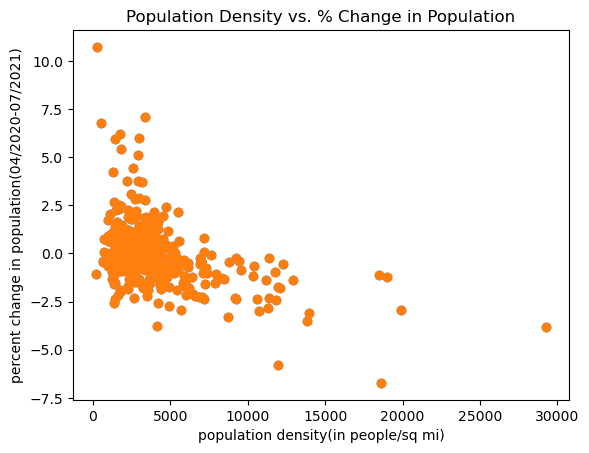

In [197]:
#data set columns are str_state, float_area, float_density, float_change, float_population

plt.scatter(float_density, float_change)
img = plt.scatter(float_density, float_change)
plt.xlabel("population density(in people/sq mi)")
plt.ylabel("percent change in population(04/2020-07/2021)")
plt.title("Population Density vs. % Change in Population")

img.get_figure().savefig("PopulationDensityVsChangeInPopulation", dpi = 300)

Insights: The cities with higher density have a more negative percent change, meaning that they lost population from 04/2020-07/2021. This is as expected because when cities are more crowded, it makes sense that they would want to leave. 